# Praktikum 06

## Aufgabe 1

### 2)

In [27]:
import numpy as np
from matplotlib import pyplot as plt

x = (-0.5, -0.5) # 2D-Startwert
tol = 1.e-10 # Abbruchtoleranz
k = 0
f = (x[0]**2 + x[1]**2 + 0.6*x[1] - 0.16, x[0]**2 - x[1]**2 + x[0] - 1.6*x[1] - 0.14) # Auswertung von 2D-f in x
res = np.linalg.norm(f)
# Norm von Vektor f
while res > tol:
    k += 1
    # mehrdimensionale Ableitung (Jacobimatrix) an Stelle x
    J = np.array([[2*x[0], 2*x[1] + 0.6], [2*x[0] + 1, -2*x[1] - 1.6]])
    # x = x - J^(-1)*f %2D Newton
    # Gauss-Algorithmus, numerisch besser als d=inv(J)*f
    d = np.linalg.solve(J, f)
    x = x- d # 2D Newton-Schritt
    f = (x[0]**2 + x[1]**2 + 0.6*x[1] - 0.16, x[0]**2 - x[1]**2 + x[0] - 1.6*x[1] - 0.14) # 2D-f an neuer Stelle x
    res = np.linalg.norm(f)
print("x =", x, "in", k, "Schritten" )

x = [-0.5 -0.3] in 5 Schritten


### 3)

In [10]:
# Multi Newton
def newton(f, J, x0, tol=1.e-10):
    max_loops = 1000
    x = x0
    k = 0
    res = np.linalg.norm(f(x))
    while res > tol and k < max_loops:
        k += 1
        d = np.linalg.solve(J(x), f(x))
        x = x - d
        res = np.linalg.norm(f(x))
    return x, k

In [16]:
f = lambda x: (x[0]**2 + x[0]*x[1]**3 - 9, 3*x[0]**2*x[1] - x[1]**3 - 4)
J = lambda x: np.array([[2*x[0] + x[1]**3, 3*x[0]*x[1]**2], [6*x[0]*x[1], 3*x[0]**2 - 3*x[1]**2]])

x0 = np.array([3, -1])
print(f"{x0}: {newton(f, J, x0)}")

x1 = np.array([1, 2])
print(f"{x1}: {newton(f, J, x1)}")

x2 = np.array([1, -1.5])
print(f"{x2}: {newton(f, J, x1)}")

x3 = np.array([0, -2])
print(f"{x3}: {newton(f, J, x1)}")

[ 3 -1]: (array([2.99836535, 0.14843098]), 6)
[1 2]: (array([1.33635538, 1.7542352 ]), 4)
[ 1.  -1.5]: (array([1.33635538, 1.7542352 ]), 4)
[ 0 -2]: (array([1.33635538, 1.7542352 ]), 4)


## Aufgabe 2

In [17]:
def newton_tol(f, f1, x0, tol=1.e-10):
    x = x0
    i = 0
    while abs(f(x)) > tol and i < 100:
        i += 1
        x = x - f(x) / f1(x)
    return x

In [18]:
f_1 = lambda x: 1+np.tan(x)**2 - np.exp(x)
f_2 = lambda x: 2*np.tan(x) + 2*np.tan(x)**3 - np.exp(x)
newton_tol(f_1, f_2, 0.8)

0.8644392227690583

### Aufgabe 3

In [22]:
f = lambda x: (-2*x[0]**3 + 3*x[1]**2 + 42, 5*x[0]**2 + 3*x[1]**3 - 69)
J = lambda x: np.array([[-6*x[0]**2, 6*x[1]], [10*x[0], 9*x[1]**2]])

x0 = np.array([1, 1])
print(f"{x0}: {newton(f, J, x0, tol=1.e-8)}")

[1 1]: (array([3., 2.]), 16)


## Aufgabe 4

In [23]:
f = lambda x: (x[0]*np.exp(x[1]) - 1, x[1] - 1 - x[0]**2)
J = lambda x: np.array([[np.exp(x[1]), x[0]*np.exp(x[1])], [-2*x[0], 1]])

x0 = np.array([-1, -1])
print(f"{x0}: {newton(f, J, x0, tol=1.e-6)}")

[-1 -1]: (array([0.32993569, 1.10885756]), 11)


## Aufgabe 7

### a)

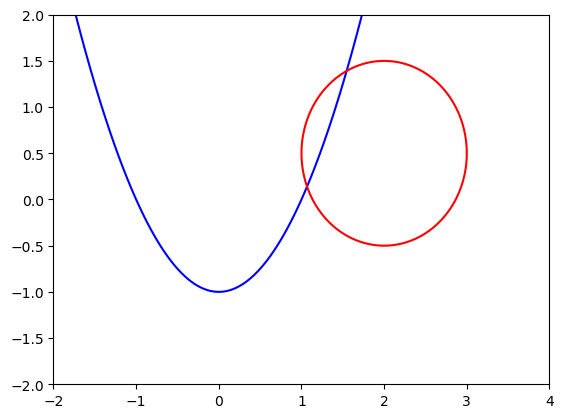

In [34]:
f_1 = lambda x: x[0]**2 - x[1] -1
f_2 = lambda x: (x[0] - 2)**2 + (x[1] - 1/2)**2 - 1

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots()

ax.contour(X, Y, [[f_1([x, y]) for x in np.linspace(-2, 2, 100)] for y in np.linspace(-2, 2, 100)], levels=[0], colors='b')
x = np.linspace(0, 4, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
ax.contour(X, Y, [[f_2([x, y]) for x in np.linspace(0, 4, 100)] for y in np.linspace(-2, 2, 100)], levels=[0], colors='r')

In [42]:
x0 = np.array([1, 0])
J = lambda x: np.array([[2*x[0], -1], [2*x[0] - 4, 2*x[1] - 1]])
newton(lambda x: (f_1(x), f_2(x)), J, x0)

(array([1.06734609, 0.13922767]), 4)

In [47]:
x1 = np.array([2, 1])
J = lambda x: np.array([[2*x[0], -1], [2*x[0] - 4, 2*x[1] - 1]])
newton(lambda x: (f_1(x), f_2(x)), J, x1)

(array([1.54634288, 1.39117631]), 5)